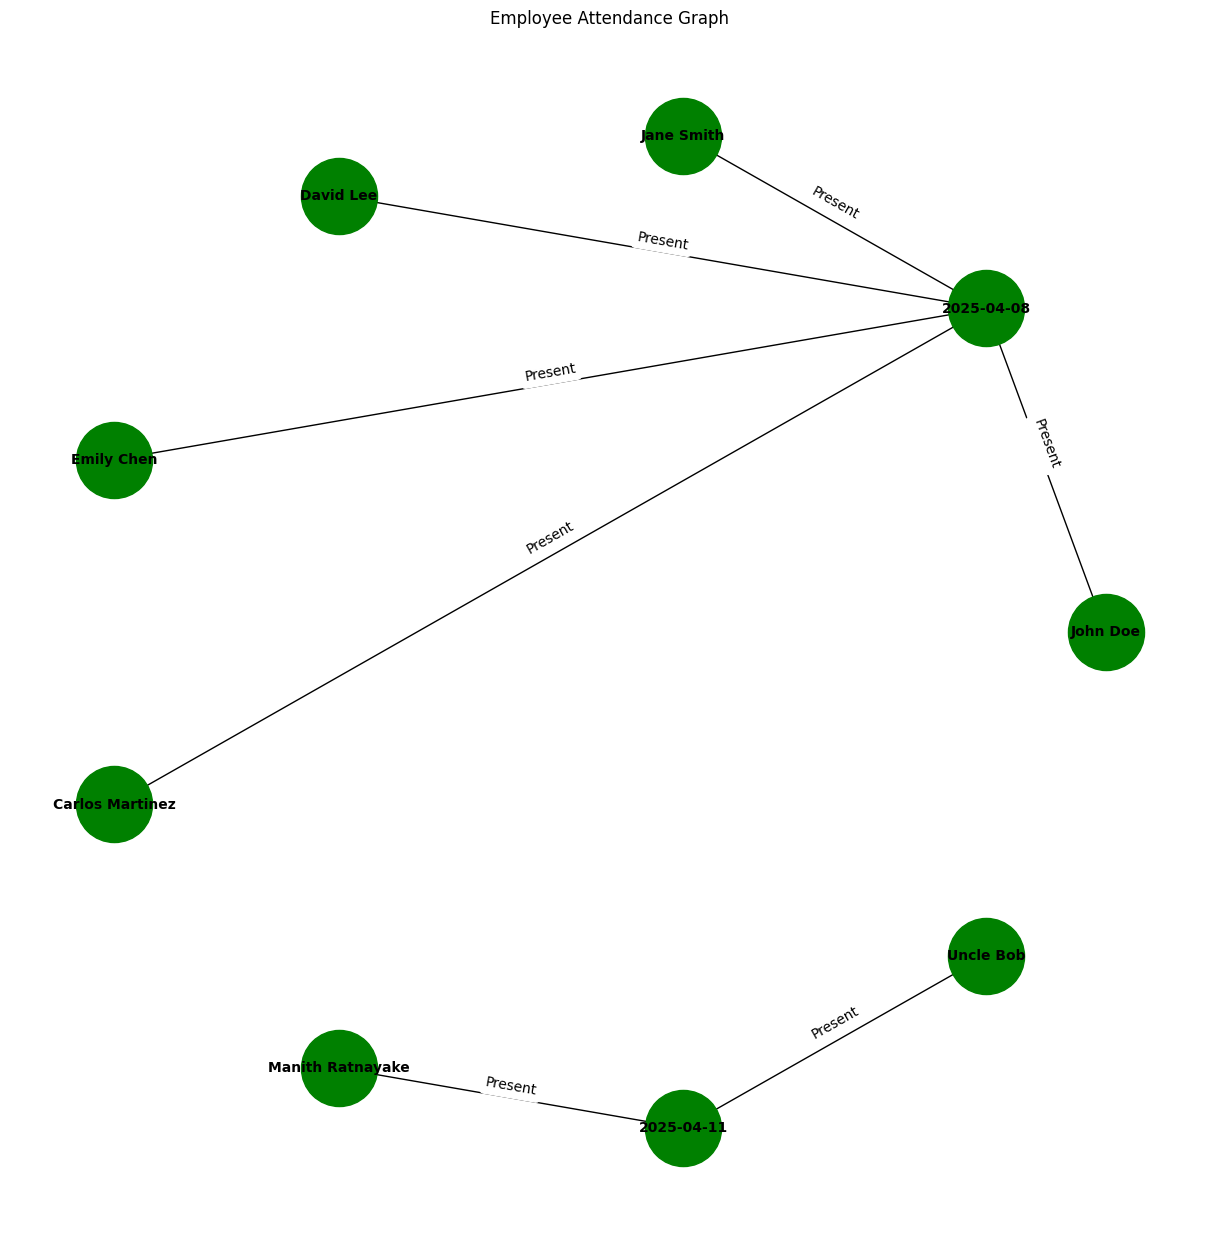

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph("bolt://localhost:7687", auth=("neo4j", "Manith@123"))

# Query to get employee and attendance data
query = """
MATCH (e:Employee)-[r:ATTENDED]->(d:Date)
RETURN e.name AS employee, d.date AS date, r.status AS status
"""
result = graph.run(query)

# Create a NetworkX graph
G = nx.Graph()

# Add nodes and relationships (edges) from the result
for record in result:
    employee = record["employee"]
    date = record["date"]
    status = record["status"]
    
    # Add nodes
    G.add_node(employee, type="Employee")
    G.add_node(date, type="Date")
    
    # Add relationship (edge)
    G.add_edge(employee, date, status=status)

# Set figure size for better visibility
plt.figure(figsize=(12, 12))

# Use a different layout (e.g., circular_layout)
pos = nx.circular_layout(G)  # You can change this to any layout you prefer

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="green", font_size=10, font_weight='bold')

# Draw edge labels with adjusted positioning
edge_labels = nx.get_edge_attributes(G, "status")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, verticalalignment='bottom')

# Show the plot
plt.title("Employee Attendance Graph")
plt.show()


In [30]:
from py2neo import Graph
from yfiles_jupyter_graphs import GraphWidget

# Connect to Neo4j
graph = Graph("bolt://localhost:7687", auth=("neo4j", "Manith@123"))

# Run the query
query = """
MATCH (e:Employee)-[r:ATTENDED]->(d:Date)
RETURN e.name AS employee, d.date AS date, r.status AS status
"""
result = graph.run(query)

# Collect nodes and edges
nodes = {}
edges = []

for record in result:
    emp = record["employee"]
    date = record["date"]
    status = record["status"]
    
    if emp not in nodes:
        nodes[emp] = { "id": emp, "label": emp, "type": "Employee", "style": { "fill": "#A2D5AB" } }
    if date not in nodes:
        nodes[date] = { "id": date, "label": date, "type": "Date", "style": { "fill": "black" } }
    
    edges.append({
        "source": emp,
        "target": date,
        "label": status,
        "style": { "stroke": "red" }
    })

# Create the graph widget
g = GraphWidget()

# Load the graph
g.graph = {
    "nodes": list(nodes.values()),
    "edges": edges
}

from IPython.display import display
display(g)


GraphWidget(layout=Layout(height='500px', width='100%'))

In [31]:
from py2neo import Graph
from yfiles_jupyter_graphs import GraphWidget
from IPython.display import display

# Connect to Neo4j
graph = Graph("bolt://localhost:7687", auth=("neo4j", "Manith@123"))

# Run the query
query = """
MATCH (e:Employee)-[r:ATTENDED]->(d:Date)
RETURN e.name AS employee, d.date AS date, r.status AS status
"""
result = graph.run(query)

# Collect nodes and edges
nodes = {}
edges = []

for record in result:
    emp = record["employee"]
    date = record["date"]
    status = record["status"]
    
    if emp not in nodes:
        nodes[emp] = {
            "id": emp,
            "label": emp,
            "type": "Employee",
            "style": {
                "fill": "#A2D5AB",
                "label": {
                    "textFill": "black",
                    "font": "bold 12px Arial"
                }
            }
        }
    
    if date not in nodes:
        nodes[date] = {
            "id": date,
            "label": date,
            "type": "Date",
            "style": {
                "fill": "black",
                "label": {
                    "textFill": "white",
                    "font": "bold 12px Arial"
                }
            }
        }
    
    edges.append({
        "source": emp,
        "target": date,
        "label": status,
        "style": {
            "stroke": "gray",
            "label": {
                "textFill": "black",
                "font": "italic 11px Arial"
            }
        }
    })

# Create the graph widget
g = GraphWidget()

# Load the graph
g.graph = {
    "nodes": list(nodes.values()),
    "edges": edges
}

# Display the graph widget
g  # Make sure this is the last line in the cell


GraphWidget(layout=Layout(height='500px', width='100%'))